# ICLR Workshop Challenge #1: CGIAR Computer Vision for Crop Disease

Amritha Musipatla and Grisam Shah  
CU_sm3773_gvs2110

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

## Imports and packages

In [295]:
import os
import csv
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split

from fastai.vision import * 

## Preprocessing

In this section we format the given train and test image sets to standard form.

In [281]:
train_dir = "data/train/"
test_dir = "data/test"

# Convert all images to jpg
for subdir, dirs, ims in os.walk(train_dir):
    for im in ims:
        im_path = subdir + os.sep + im
        if im.endswith(".jfif"): 
            im_name, ext = os.path.splitext(im_path)
            im_convert = im_name + ".jpg"
            print(os.path.join(im_path))
            try:
                Image.open(im_path).save(im_convert)
                os.remove(im_path)
            except IOError:
                print("cannot convert", im_path)
            continue
        else:
            continue
            
for subdir, dirs, ims in os.walk(test_dir):
    for im in ims:
        im_path = subdir + os.sep + im
        if im.endswith(".jfif"): 
            im_name, ext = os.path.splitext(im_path)
            im_convert = im_name + ".jpg"
            print(os.path.join(im_path))
            try:
                Image.open(im_path).save(im_convert)
                os.remove(im_path)
            except IOError:
                print("cannot convert", im_path)
            continue
        else:
            continue

Format images as array and reshape to standard size:

In [282]:
def image_to_array(image_path, default_size):
    try:
        im = Image.open(image_path)
        if im is not None:
            out = im.resize(default_size)
            return img_to_array(out)
        else:
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

Create training data array.

In [283]:
default_size = [512, 512]

train_data = []
train_labels = []
for subdir, dirs, ims in os.walk(train_dir):
    for im in ims:
        if im.endswith(".jpg") or im.endswith(".JPG"): 
            im_path = subdir + os.sep + im
            train_data.append(image_to_array(im_path, default_size))
            train_labels.append(subdir.split(os.sep)[-1])
            
# One hot encoding labels
label_binarizer = LabelBinarizer()
train_labels = label_binarizer.fit_transform(train_labels)
n_classes = len(label_binarizer.classes_)
print("classes: ", label_binarizer.classes_)

classes:  ['healthy_wheat' 'leaf_rust' 'stem_rust']


Format training data into NumPy array.

In [284]:
np_train_data = np.array(train_data, dtype=np.float64) / 255.0

Confirm image integrity by plotting.

(866, 512, 512, 3)
(512, 512, 3)


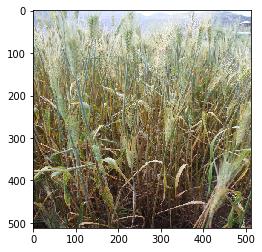

[[[0.68235294 0.74117647 0.8627451 ]
  [0.69803922 0.72941176 0.8745098 ]
  [0.65490196 0.72156863 0.83921569]
  ...
  [0.9372549  0.97254902 1.        ]
  [0.9372549  0.97254902 1.        ]
  [0.9372549  0.97254902 1.        ]]

 [[0.65882353 0.7254902  0.84313725]
  [0.73333333 0.78039216 0.8745098 ]
  [0.70196078 0.75686275 0.87058824]
  ...
  [0.9372549  0.97254902 1.        ]
  [0.9372549  0.97254902 1.        ]
  [0.9372549  0.97254902 1.        ]]

 [[0.63137255 0.69019608 0.84313725]
  [0.67058824 0.73333333 0.83529412]
  [0.77254902 0.80784314 0.8745098 ]
  ...
  [0.94901961 0.97647059 1.        ]
  [0.94901961 0.97647059 1.        ]
  [0.94117647 0.96862745 1.        ]]

 ...

 [[0.08235294 0.07843137 0.0627451 ]
  [0.06666667 0.05882353 0.0627451 ]
  [0.10588235 0.08235294 0.08235294]
  ...
  [0.56862745 0.41960784 0.27843137]
  [0.62745098 0.49019608 0.34117647]
  [0.67058824 0.52156863 0.43137255]]

 [[0.09019608 0.07843137 0.05882353]
  [0.07058824 0.05490196 0.05882353]


In [285]:
print(np_train_data.shape)
print(np_train_data[5].shape)

plt.imshow(np_train_data[5])
plt.show()
print(np_train_data[5])

## Setting up NN model

Create the model: 

Compiling the model.

## Training Model

Setting up a train/test split.

In [288]:
# Using sklearn's train_test_split
x_train, x_test, y_train, y_test = train_test_split(np_train_data, train_labels, test_size=0.2, random_state = 42) 

## Measuring Model

## Making Predictions

Formatting test data:

In [1]:
#df = pd.DataFrame(columns=['ID','leaf_rust','stem_rust','healthy_wheat'])

Save predictions to file submission format. 

In [ ]:
print(df)
df.to_csv('submission2.csv')